<a href="https://colab.research.google.com/github/melihkurtaran/Fraud_Detection/blob/main/XAI_FraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Fraud Detection Project XAI on generated datasets**

In [111]:
#Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.subplots as sp
import seaborn as sns
import itertools
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import matthews_corrcoef

In [ ]:
#Connect to GitHub for faster access
!git clone https://github.com/melihkurtaran/Fraud_Detection.git

fatal: destination path 'Fraud_Detection' already exists and is not an empty directory.


In [ ]:
# Upload the gendered datasets
female = pd.read_csv("Fraud_Detection/datasets/generated_datasets/adults_2550_female_urban.csv", delimiter='|')
male = pd.read_csv("Fraud_Detection/datasets/generated_datasets/adults_2550_male_urban.csv", delimiter='|')

In [ ]:
female = female.rename(columns={'merch_long,,': 'merch_long'})

# Merge the dataframes
df = pd.concat([female, male])

df = df.reset_index(drop=True)

In [94]:
df.head()

,ssn,cc_num,first,last,gender,street,city,state,zip,lat,...,trans_time,unix_time,category,amt,is_fraud,merchant,merch_lat,hour,day,month
0,115-04-4507,4218196001337,Kathy,Johnson,F,863 Lawrence Valleys,Homosassa,FL,34446,28.7508,...,01:47:59,1670806079,shopping_net,10.13,1,fraud_Fisher-Schowalter,28.312405,1,0,12
1,115-04-4507,4218196001337,Kathy,Johnson,F,863 Lawrence Valleys,Homosassa,FL,34446,28.7508,...,03:39:36,1670812776,shopping_pos,814.04,1,fraud_Lynch Ltd,28.522520,3,0,12
2,115-04-4507,4218196001337,Kathy,Johnson,F,863 Lawrence Valleys,Homosassa,FL,34446,28.7508,...,02:33:53,1670808833,gas_transport,969.16,1,fraud_Cummerata-Jones,27.874119,2,0,12
3,115-04-4507,4218196001337,Kathy,Johnson,F,863 Lawrence Valleys,Homosassa,FL,34446,28.7508,...,03:36:20,1670898980,shopping_pos,743.97,1,fraud_Dooley Inc,29.525702,3,1,12
4,115-04-4507,4218196001337,Kathy,Johnson,F,863 Lawrence Valleys,Homosassa,FL,34446,28.7508,...,01:04:54,1670889894,shopping_pos,791.05,1,fraud_Stoltenberg-Beatty,28.629166,1,1,12


No null values!

In [ ]:
# Check for null values
null_df = df.isnull()

# Check if there are any null values in the original dataframe
if null_df.any().any():
    print("There are null values in the dataframe")
else:
    print("There are no null values in the dataframe")

There are no null values in the dataframe


In [93]:
df = df.drop(['merch_long'], axis=1)
#df = df.drop(['ssn', 'cc_num','first','last','city','state','zip','street','dob','acct_num','profile','trans_num','trans_date','trans_time','unix_time','merch_long'], axis=1)

# **Data Exploration**

In [ ]:
df.columns

Index(['ssn', 'cc_num', 'first', 'last', 'gender', 'street', 'city', 'state',
       'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'acct_num', 'profile',
       'trans_num', 'trans_date', 'trans_time', 'unix_time', 'category', 'amt',
       'is_fraud', 'merchant', 'merch_lat', 'merch_long'],
      dtype='object')

Checking the imbalance for frauds

In [ ]:
# Define colors and labels for the pie chart
colors = ['#00BFFF', '#FFD700']  # blue and gold
labels = ['Normal Transactions', 'Fraudulent Transactions']

# Calculate the percentage of fraudulent transactions
fraud_percentage = df['is_fraud'].value_counts(normalize=True) * 100

# Create a Pie chart with Plotly
fig = go.Figure(data=[go.Pie(labels=labels,
                             values=fraud_percentage,
                             hole=.3)])

# Customize the chart colors, fonts, and layout
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=18,
                  marker=dict(colors=colors, line=dict(color='white', width=0.1)))
fig.update_layout(
    title_text="Credit Card Transactions",
    title_font=dict(size=24, color='white'),
    legend_title_font=dict(size=20, color='yellow'),
    paper_bgcolor="black",
    plot_bgcolor='black',
    font=dict(color='white', size=16)
)

# Show the chart
fig.show()

Checking the gender balance

In [ ]:
# Define colors and labels for the pie chart
colors = ['#FF69B4', '#1E90FF']  # pink and blue
labels = ['Female', 'Male']

# Calculate the percentage of transactions by gender
gender_percentage = df['gender'].value_counts(normalize=True) * 100
gender_counts = df['gender'].value_counts()

# Create a Pie chart with Plotly
fig = go.Figure(data=[go.Pie(labels=labels,
                             values=gender_percentage,
                             hole=.3)])

# Customize the chart colors, fonts, and layout
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=18,
                  marker=dict(colors=colors, line=dict(color='white', width=0.1)))
fig.update_layout(
    title_text="Credit Card Transactions by Gender",
    title_font=dict(size=24, color='white'),
    legend_title_font=dict(size=20, color='yellow'),
    paper_bgcolor="black",
    plot_bgcolor='black',
    font=dict(color='white', size=16)
)

# Show the chart
fig.show()


In [ ]:
gender_counts

F    60301
M    51663
Name: gender, dtype: int64

Fraud Analysis based on the amount

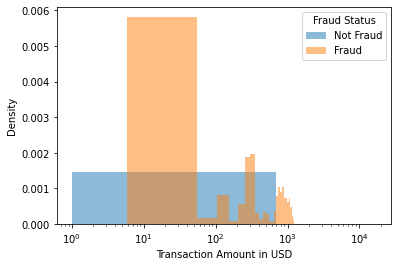

In [ ]:
# Create a histogram of transaction amounts for non-fraudulent transactions
plt.hist(df[df['is_fraud']==0]['amt'], bins=25, alpha=0.5, label='Not Fraud', density=True)

# Create a histogram of transaction amounts for fraudulent transactions
plt.hist(df[df['is_fraud']==1]['amt'], bins=25, alpha=0.5, label='Fraud', density=True)

# Add labels and legend to the plot
plt.ylabel('Density')
plt.xlabel('Transaction Amount in USD')
plt.xscale('log')
plt.legend(title='Fraud Status')

Text(0.5, 1.0, 'The Percentage Difference of Fraudulent over Non-Fraudulent Transations in Each Spending Category ')

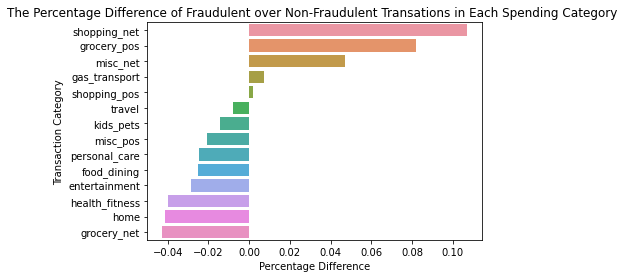

In [ ]:
#calculate the percentage difference
a=df[df['is_fraud']==0]['category'].value_counts(normalize=True).to_frame().reset_index()
a.columns=['category','not fraud percentage']

b=df[df['is_fraud']==1]['category'].value_counts(normalize=True).to_frame().reset_index()
b.columns=['category','fraud percentage']
ab=a.merge(b,on='category')
ab['diff']=ab['fraud percentage']-ab['not fraud percentage']

ax=sns.barplot(y='category',x='diff',data=ab.sort_values('diff',ascending=False))
ax.set_xlabel('Percentage Difference')
ax.set_ylabel('Transaction Category')
plt.title('The Percentage Difference of Fraudulent over Non-Fraudulent Transations in Each Spending Category ')

Certain categories of spending experience a higher incidence of fraud compared to others. Transactions categorized as 'Shopping_net', 'Grocery_pos', and 'misc_net' are more susceptible to fraud, whereas transactions categorized as 'home' and 'grocery_net' are more likely to be genuine than fraudulent.

This clearly shows fraud usually happens during late night hours

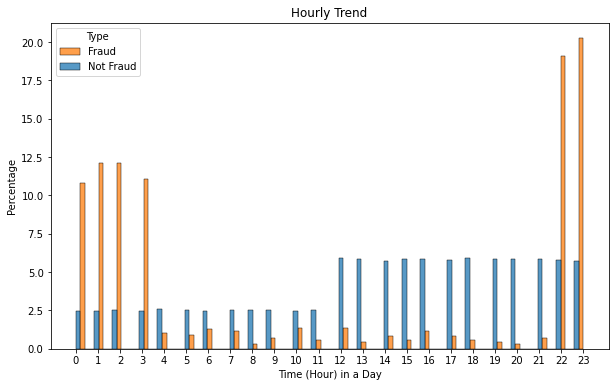

In [83]:
df['hour'] = pd.to_datetime(df['trans_time']).dt.hour
plt.figure(figsize=(10, 6))

ax = sns.histplot(data=df, x="hour", hue="is_fraud", common_norm=False, stat='percent', multiple='dodge')
ax.set_ylabel('Percentage')
ax.set_xlabel('Time (Hour) in a Day')
plt.xticks(np.arange(0,24,1))
plt.title("Hourly Trend")
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

# Show the plot
plt.show()


Based on gender, payments from males are more fradualent

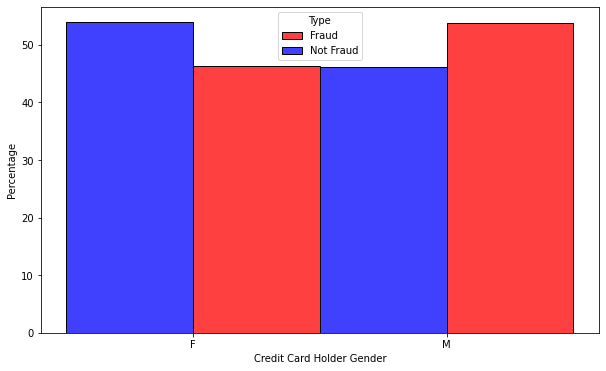

In [ ]:
colors = ['blue', 'red']
plt.figure(figsize=(10, 6))

# Create a histogram of fraud counts by gender
ax = sns.histplot(x='gender', data=df, hue='is_fraud', stat='percent', multiple='dodge', common_norm=False, palette=colors)

# Add labels and legend to the plot
ax.set_ylabel('Percentage')
ax.set_xlabel('Credit Card Holder Gender')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])


<ipython-input-89-3ed3b6064aaf>:5: UserWarning:

FixedFormatter should only be used together with FixedLocator



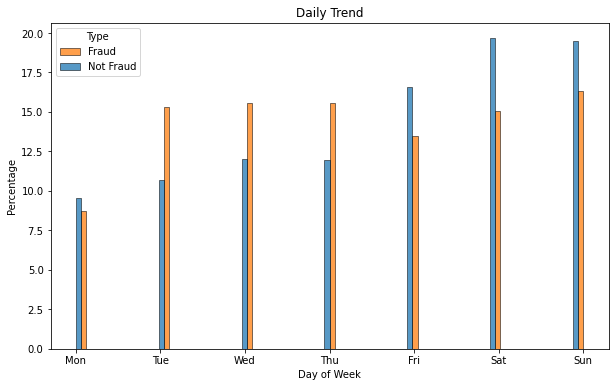

In [89]:
#day of week vs fraud
df['day']=pd.to_datetime(df['trans_date']).dt.dayofweek
plt.figure(figsize=(10, 6))
ax=sns.histplot(data=df, x="day", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge')
ax.set_xticklabels(['',"Mon","Tue","Wed","Thu","Fri","Sat","Sun"])
ax.set_ylabel('Percentage')
ax.set_xlabel('Day of Week')
plt.title('Daily Trend')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

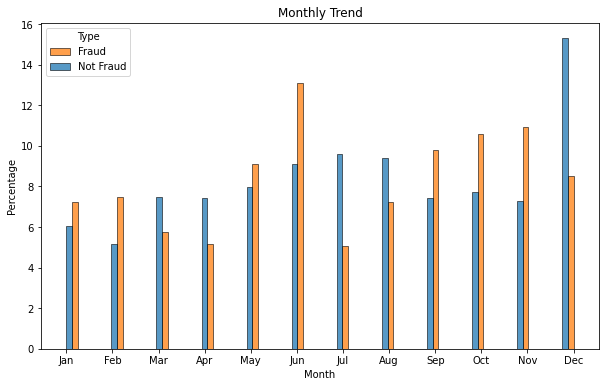

In [90]:
#month vs fraud
df['month']=pd.to_datetime(df['trans_date']).dt.month
plt.figure(figsize=(10, 6))
ax=sns.histplot(data=df, x="month", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge')
ax.set_ylabel('Percentage')
ax.set_xlabel('Month')
plt.title('Monthly Trend')
plt.xticks(np.arange(1,13,1))
ax.set_xticklabels(["Jan","Feb","Mar","Apr","May","Jun","Jul",'Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

# **Prediction**

In [123]:
df.columns

Index(['ssn', 'cc_num', 'first', 'last', 'gender', 'street', 'city', 'state',
       'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'acct_num', 'profile',
       'trans_num', 'trans_date', 'trans_time', 'unix_time', 'category', 'amt',
       'is_fraud', 'merchant', 'merch_lat', 'hour', 'day', 'month'],
      dtype='object')

In [124]:
train=df[['category','amt','zip','lat','long','city_pop','merch_lat','merchant','hour','day','month','is_fraud']]

#convert category to dummy variables
train=pd.get_dummies(train, drop_first=True)
y=train['is_fraud'].values
X=train.drop("is_fraud", axis='columns')

In [125]:
# Split the dataset into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Random Forest

In [126]:
#random forest 
method= SMOTE()
X_resampled, y_resampled = method.fit_resample(X_train, y_train)
rf = RandomForestClassifier(random_state=36)
rf.fit(X_resampled,y_resampled)
predicted=rf.predict(X_test)
print('Classification report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)
print('Share of Non-Fraud in Test Data:', 1-round(y_test.sum()/len(y_test),4))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     22237
           1       0.91      0.62      0.74       156

    accuracy                           1.00     22393
   macro avg       0.96      0.81      0.87     22393
weighted avg       1.00      1.00      1.00     22393

Confusion matrix:
 [[22228     9]
 [   60    96]]
Share of Non-Fraud in Test Data: 0.993


In [127]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues,
                          ax=None):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    if ax is None:
        fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set_title(title)

    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_xticklabels(classes, rotation=45)
    ax.set_yticks(tick_marks)
    ax.set_yticklabels(classes)
    ax.grid(False)


    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')

Confusion matrix, without normalization
[[22228     9]
 [   60    96]]


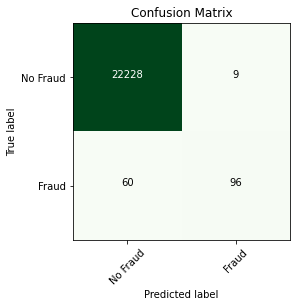

In [128]:
labels = ['No Fraud', 'Fraud']
# Plot the confusion matrix 
plot_confusion_matrix(conf_mat,labels,title="Confusion Matrix",cmap=plt.cm.Greens)

In [129]:
mcc = matthews_corrcoef(y_test, predicted)
cba = (conf_mat[0][0] / (conf_mat[0][0] + conf_mat[0][1])) * (conf_mat[1][1] / (conf_mat[1][0] + conf_mat[1][1]))
print("MCC value: " + str(mcc))
print("CBA value: " + str(cba))

MCC value: 0.7487401269634313
CBA value: 0.6151355502437034


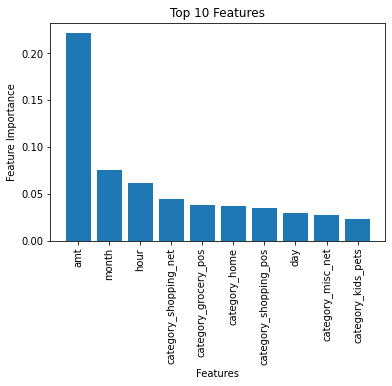

In [130]:
# Get feature importances from the trained model
importances = rf.feature_importances_

# Get the indices that would sort the array in descending order
sorted_idx = importances.argsort()[::-1]

# Get the top 10 features
top_10_features = sorted_idx[:10]

# Get the names of the top 10 features
feature_names = X.columns[top_10_features]

# Plot a bar chart of the top 10 features
plt.bar(feature_names, importances[top_10_features])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Top 10 Features')
plt.show()


According to the feature importances, the most importantt feature is the amount, followed by its month,hour abd category being shopping_net and grocery.